In [1]:
from result_saver import SaverProvider

provider = SaverProvider()

In [2]:
backend = provider.get_backend('ibm_sherbrooke')

In [4]:
for edge in backend.coupling_map:
    print(edge)

(1, 0)
(1, 2)
(3, 2)
(4, 3)
(4, 15)
(5, 4)
(6, 5)
(7, 6)
(8, 7)
(8, 9)
(10, 9)
(10, 11)
(11, 12)
(12, 13)
(14, 0)
(14, 18)
(16, 8)
(17, 12)
(17, 30)
(18, 19)
(19, 20)
(20, 33)
(21, 20)
(21, 22)
(22, 15)
(23, 22)
(23, 24)
(25, 24)
(26, 16)
(26, 25)
(26, 27)
(28, 27)
(29, 28)
(29, 30)
(31, 30)
(31, 32)
(32, 36)
(33, 39)
(34, 24)
(35, 28)
(35, 47)
(36, 51)
(37, 38)
(38, 39)
(40, 39)
(41, 40)
(41, 53)
(42, 41)
(43, 34)
(43, 42)
(43, 44)
(45, 44)
(45, 46)
(47, 46)
(47, 48)
(49, 48)
(49, 50)
(50, 51)
(52, 37)
(53, 60)
(54, 45)
(55, 49)
(56, 52)
(56, 57)
(57, 58)
(59, 58)
(59, 60)
(61, 60)
(61, 62)
(63, 62)
(63, 64)
(64, 54)
(64, 65)
(66, 65)
(67, 66)
(68, 55)
(68, 67)
(69, 68)
(69, 70)
(71, 58)
(71, 77)
(72, 62)
(73, 66)
(73, 85)
(74, 70)
(75, 76)
(77, 76)
(78, 77)
(78, 79)
(79, 91)
(80, 79)
(80, 81)
(81, 72)
(81, 82)
(82, 83)
(84, 83)
(85, 84)
(86, 85)
(86, 87)
(87, 88)
(89, 74)
(89, 88)
(90, 75)
(90, 94)
(92, 83)
(92, 102)
(93, 87)
(93, 106)
(95, 94)
(95, 96)
(97, 96)
(97, 98)
(98, 91)
(99

In [7]:
backend.properties().readout_error(2)

0.0252

# Create the graph with weights

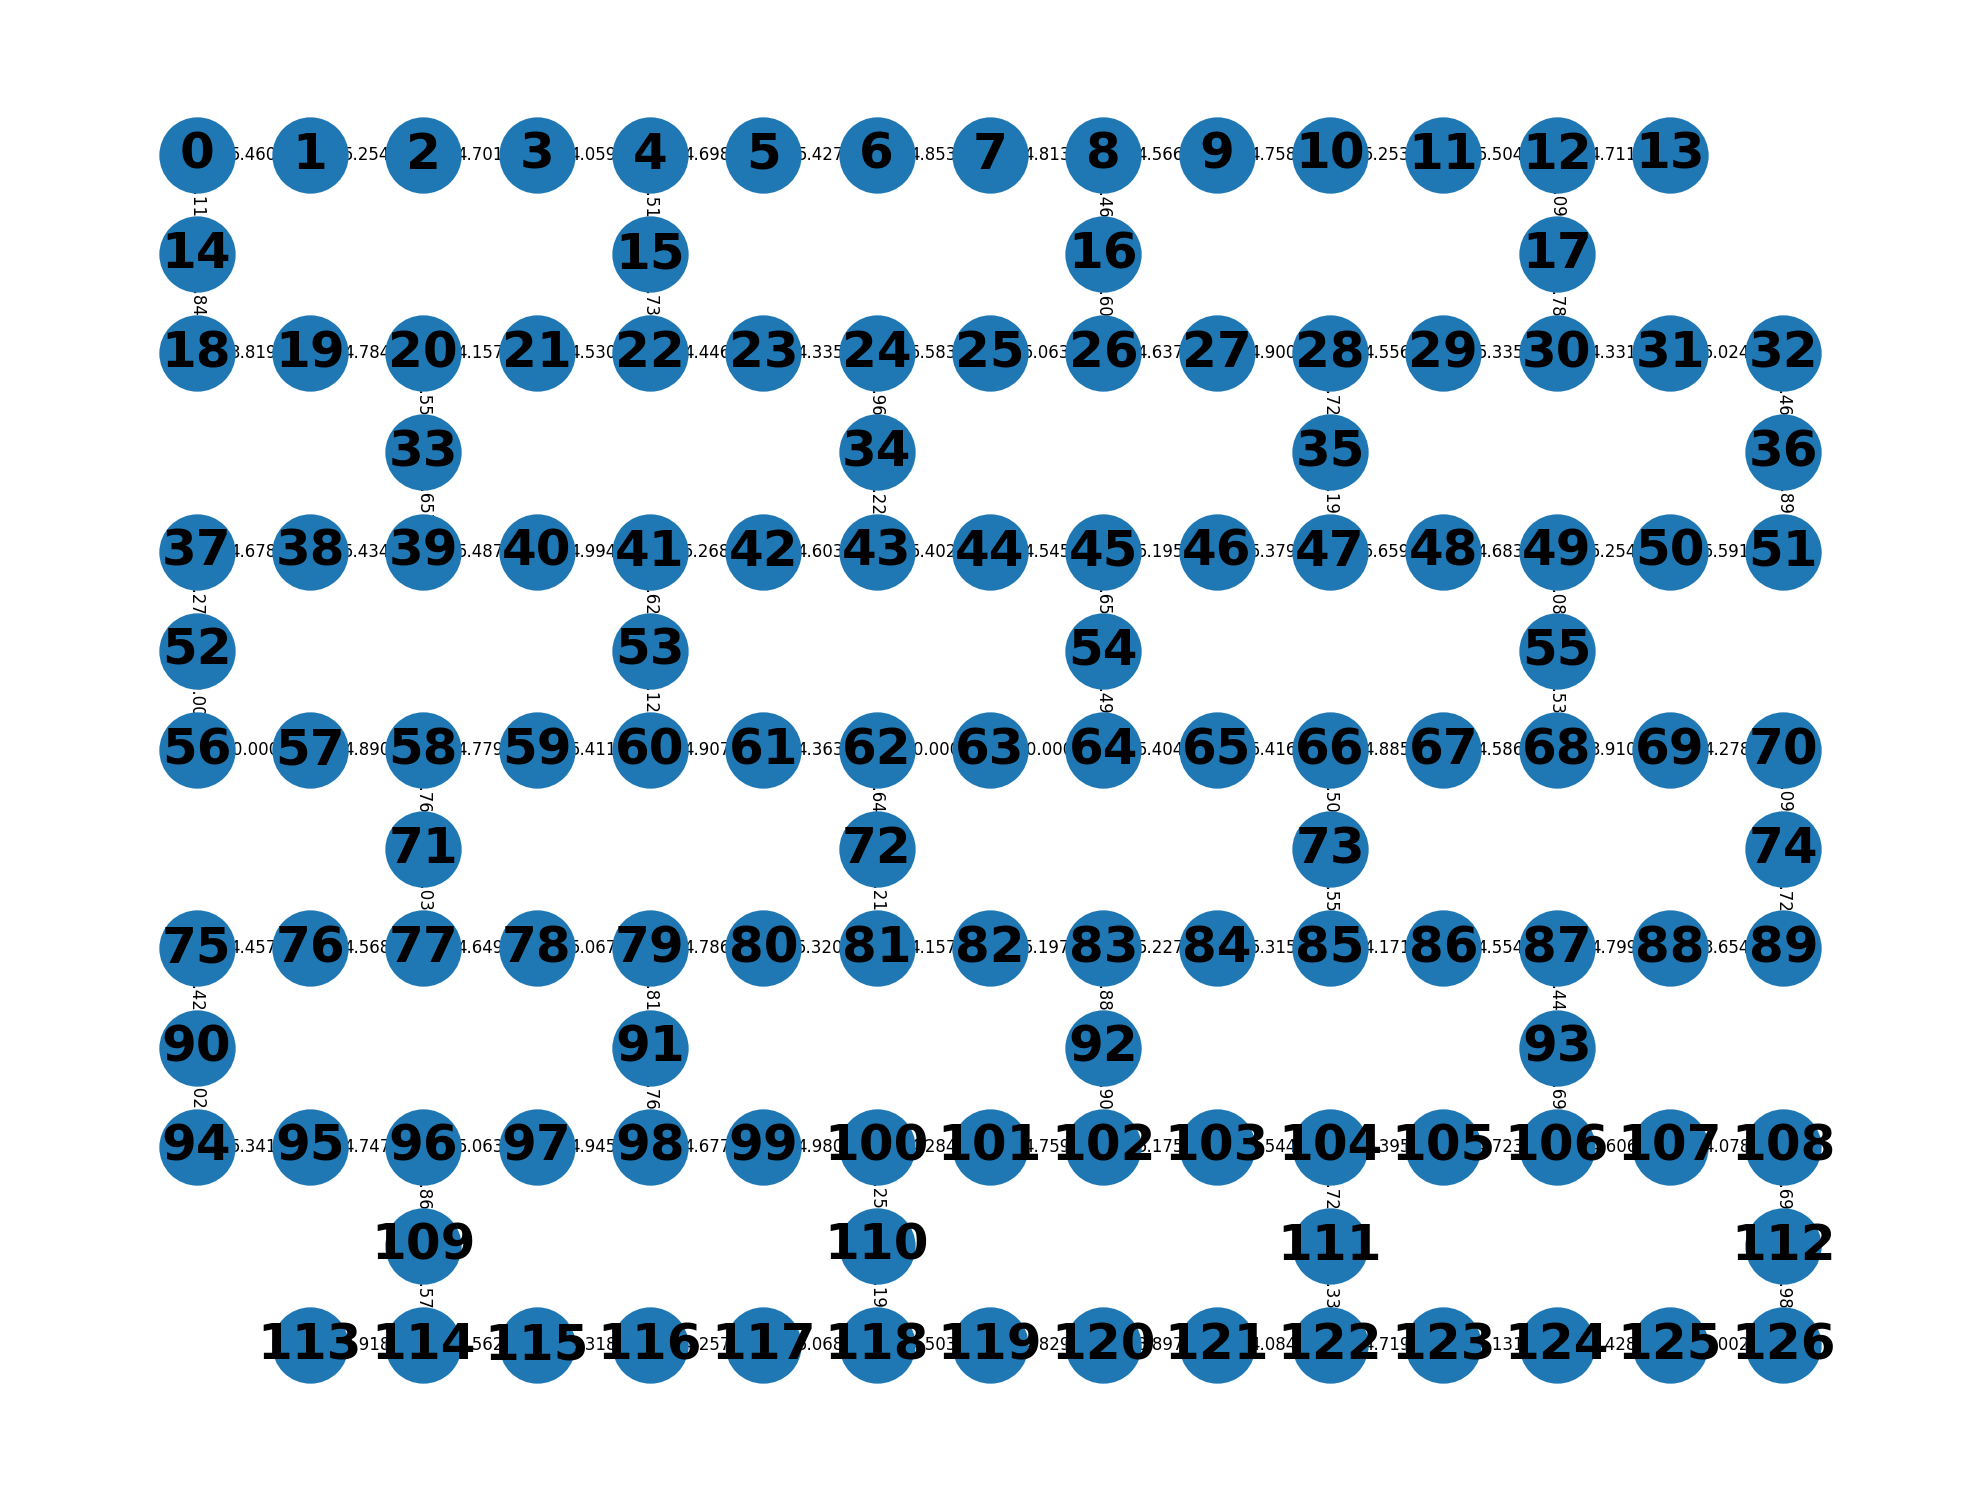

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from soft_info import add_qubit_positions
import numpy as np

# Assuming backend and backend.properties() are already defined and accessible
G = nx.Graph()
for edge in backend.coupling_map:
    # Make sure 'ecr' is the correct gate name; it might be 'cx' or another two-qubit gate depending on your backend
    weight = -np.log(backend.properties().gate_error('ecr', edge))  # Use 'cx' or appropriate gate name
    G.add_edge(edge[0], edge[1], weight=weight)

add_qubit_positions(G, backend.configuration().n_qubits)

pos = nx.get_node_attributes(G, 'pos')

# Draw the graph

plt.figure(dpi=300)
nx.draw(G, pos, with_labels=True, font_weight='bold')

# Get edge weights in a format suitable for nx.draw_networkx_edge_labels
edge_weights = nx.get_edge_attributes(G, 'weight')
# Format the weights to a desired precision, e.g., to 3 decimal places
edge_weights = {k: f'{v:.3f}' for k, v in edge_weights.items()}

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=4)

# Display the plot
plt.show()
